In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
dataset = pd.read_csv('Position_Salaries.csv')
X = dataset.iloc[:, 1:-1].values
y = dataset.iloc[:, -1].values

We'll train and test both linear regression and polynomial regression to compare which fits best.

Also, we won't split the dataset b/c there is not too much data.

## Training the linear regression model on whole dataset.

In [6]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

## Training the polynomial regression model on whole dataset.

we first need to create a matrix of powered features. (x1, x1^2, x1^3 .... x1^n)

In [12]:
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree = 4)
X_poly = poly_reg.fit_transform(X)               # matrix of powered features of column 'level'
lin_reg2 = LinearRegression()
lin_reg2.fit(X_poly, y)                           # training the polynomial regression model

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

## Visualising the Linear Regression results

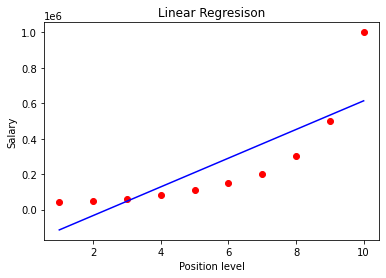

In [8]:
plt.scatter(X, y, color = 'red')
plt.plot(X, lin_reg.predict(X), color = 'blue')
plt.title('Linear Regresison')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

^^ Not quite accurate :/

## Visualising the Polynomial Regression results


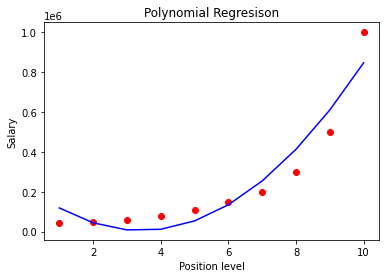

In [11]:
plt.scatter(X, y, color = 'red')
plt.plot(X, lin_reg2.predict(X_poly), color = 'blue')
plt.title('Polynomial Regresison')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

^^ not perfect but this is only degree 2, let's try higher!

We retrained the model with powered matrix degree 4, let's visualise:

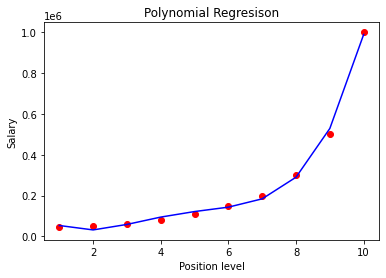

In [13]:
plt.scatter(X, y, color = 'red')
plt.plot(X, lin_reg2.predict(X_poly), color = 'blue')
plt.title('Polynomial Regresison')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

^^ So good!

## Visualising the Polynomial Regression results (for higher resolution and smoother curve) (won't be used much)

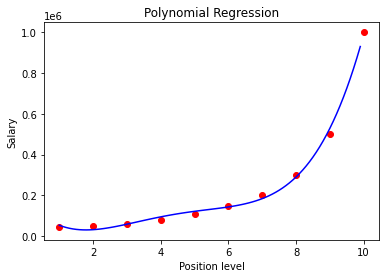

In [14]:
X_grid = np.arange(min(X), max(X), 0.1)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(X, y, color = 'red')
plt.plot(X_grid, lin_reg2.predict(poly_reg.fit_transform(X_grid)), color = 'blue')
plt.title('Polynomial Regression')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

^^ smoother and a bit over fitting.